In [1]:
import pandas as pd
import mc_processor
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import visualizing

import importlib
importlib.reload(mc_processor)
importlib.reload(visualizing)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
## toggle

# survey_year = input("What year is the survey you want to analyze from? (2022, 2023, or 2024)")
survey_year = str(2024)

In [3]:
# read results files

clarifier = "field2/rvoter/"
# clarifier = ""

codebook = pd.read_csv(os.path.join(survey_year,f'raw/levels_codebook.csv'), encoding='utf-8')
data = pd.read_csv(os.path.join(survey_year,f'raw/{clarifier}data.csv'), encoding='utf-8')
q_codebook = pd.read_csv(os.path.join(survey_year,f'raw/question_codebook.csv'), encoding='utf-8', index_col = 'qid')

# q_codebook into dict
q_codebook = q_codebook.to_dict().get('qidFull')

In [4]:
data

ResponseID  xdemAll  demZIP  BPC1_1  BPC1_2  BPC1_3  BPC1_4  \
0     R_7IawucEjaAD7m62        1   62871       4       3       4       4   
1     R_5PvmPKlU3zhT6Ip        1   15323       3       3       4       4   
2     R_1eqzVWAs7yktAfp        1   92704       1       2       1       1   
3     R_1X769eF9N081ixj        1   33322       4       4       4       4   
4     R_7jYF6R06Sd5szrH        1   63146       3       1       1       4   
...                 ...      ...     ...     ...     ...     ...     ...   
1886  R_555BybHMU7BfCJr        1   89048       5       5       4       4   
1887  R_1PUCqvYHMvY3wyn        1   83338       5       5       5       5   
1888  R_7NbIJ4hk5SloPYJ        1   98335       1       1       1       1   
1889  R_5Jt8VHzd7itmogS        1   13903       1       1       1       1   
1890  R_7ypCC3YixUrPQDu        1   91770       4       3       2       2   

      BPC1_5  BPC2_1NET  BPC2_2NET  ...  demLGBTQ1  xdemMarried  BPCxdem1  \
0          4          1          2  ...          1            2         1   
1          4          2          2  ...          1            2         1   
2          1          2          2  ...          1            2         2   
3          4          2          1  ...          1            2         2   
4          3          2          2  ...          1            2         1   
...      ...        ...        ...  ...        ...          ...       ...   
1886       4          1          2  ...          1            1         2   
1887       5          2          2  ...          1            2         2   
1888       1          2          2  ...          1            2         2   
1889       1          2          2  ...          1            2         2   
1890       4          2          2  ...          1            2         2   

      BPCxdem2  BPCxdem3  BPCxdem4  BPCxdem5  county_fips  demGender  \
0            2         2         1       1.0      17059.0        2.0   
1            2         2         1       2.0      42125.0        2.0   
2            2         2         1       NaN       6059.0        2.0   
3            2         2         1       2.0      12011.0        1.0   
4            2         2         1       NaN      29189.0        2.0   
...        ...       ...       ...       ...          ...        ...   
1886         2         2         4       1.0      32023.0        1.0   
1887         2         2         4       NaN      16053.0        1.0   
1888         2         2         1       NaN      53053.0        2.0   
1889         2         2         3       NaN      36007.0        1.0   
1890         2         2         1       2.0       6037.0        1.0   

               wts  
0     7.442290e-02  
1     2.820813e-01  
2     2.105119e+00  
3     6.565325e-01  
4     2.388342e+00  
...            ...  
1886  5.652475e+00  
1887  1.734594e-07  
1888  1.561952e+00  
1889  2.470559e-01  
1890  2.100268e+00  

[1891 rows x 219 columns]

In [5]:
nulldata = pd.DataFrame(data.isnull().sum(),columns=["Sum_Null"]) ##2204 rows in 2024
nulldata.sort_values(by=["Sum_Null"],ascending=False,inplace=True)

# nulldata[nulldata["Sum_Null"]>0].head(20)

Use `get_percents` to get percent who selected each option, works for questions that have multiple or single selection.

Demo input optional. For all demo categories, see next cell.

In [6]:
# all demo categories
for key in q_codebook:
    if "dem" in key:
        print(key)

xdemAll
demZIP
xdemGender
demAgeGeneration
xdemIdeo3
xdemInc3
xdemWhite
xdemHispBin
demBlackBin
demRaceOther
xdemReligion
xdemReligOther
xdemEvang
xdemUsr
xdemEmploy
xdemMilHH1
xdemBidenApprove
xdemBidenApprove2
demInsured
demInsType
demUnion
demLGBTQ1
xdemMarried
BPCxdem1
BPCxdem2
BPCxdem3
BPCxdem4
BPCxdem5
demGender3
demRVoter


In [7]:
# ## FILTER DATA BY REGISTERED VOTER
# print(len(data))
# data = data[data["demRVoter"]==1]
# print(len(data))


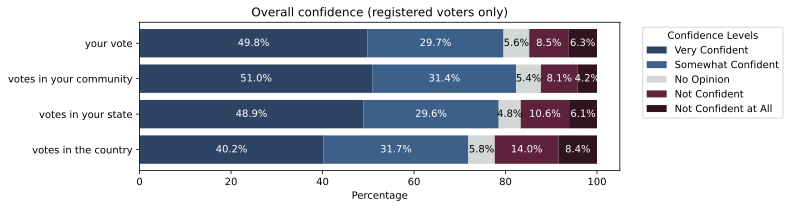

In [8]:
## OVERALL CONFIDENCE RATES

demo = None
question_number = 20

dfs = []
cols = []
for i in range(20,24):
    dfs.append(mc_processor.run_confidence(data,codebook,q_codebook,i,suppress_output=True))#.map(lambda x: f"{x:.1%}"))
    cols.append(q_codebook[f"BPC{i}a"])

df = pd.concat(dfs, axis=1)
df.columns = cols
# df
visualizing.plot_overall_confidence(df)

In [9]:
df

How confident are you that your vote in the November 2024 General Election will be counted as you intend?  \
Very confident                                                   0.498305                                                           
Somewhat confident                                               0.297317                                                           
Not to confident                                                 0.085376                                                           
Not confident at all                                             0.062704                                                           
Don't know/ No opinion                                           0.056297                                                           

                        How confident are you that votes in your county or city will be counted as intendedin the November 2024 General Election?  \
Very confident                                                   0.509549                                                                           
Somewhat confident                                               0.313740                                                                           
Not to confident                                                 0.080505                                                                           
Not confident at all                                             0.042191                                                                           
Don't know/ No opinion                                           0.054016                                                                           

                        How confident are you that votes in your state will be counted as intended in the November 2024 General Election?  \
Very confident                                                   0.489364                                                                   
Somewhat confident                                               0.295762                                                                   
Not to confident                                                 0.105769                                                                   
Not confident at all                                             0.060977                                                                   
Don't know/ No opinion                                           0.048128                                                                   

                        How confident are you that votes nationwide will be counted as intended in the November 2024 General Election?  
Very confident                                                   0.402132                                                               
Somewhat confident                                               0.316675                                                               
Not to confident                                                 0.139688                                                               
Not confident at all                                             0.083858                                                               
Don't know/ No opinion                                           0.057648

In [10]:
dfs[1]

overall
Very confident          0.509549
Somewhat confident      0.313740
Not to confident        0.080505
Don't know/ No opinion  0.054016
Not confident at all    0.042191

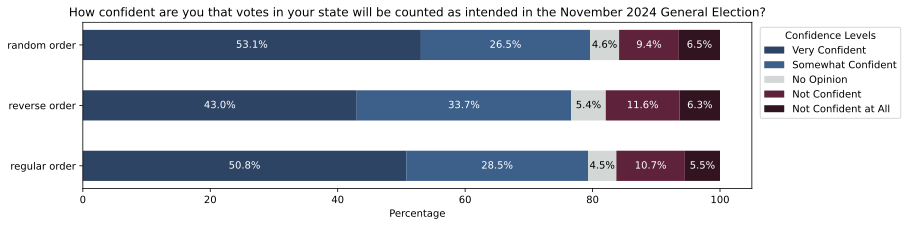

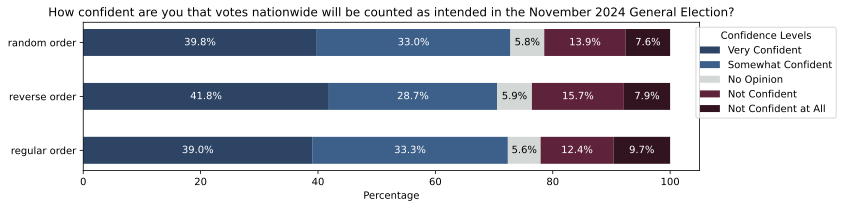

In [11]:
## TO ASK FOR CONFIDENCE QUESTIONS

#split sample a - regular order
#split sample b - reverse order
#split sample c - random order

sample_dict = {"a":"regular order","b":"reverse order","c":"random order"}

all_dfs = []

for i in range(20,24):
    # store dfs for each sample
    q_dfs = []    
    for split_sample in ["a","b","c"]:
        question = "BPC"+str(i)+split_sample
    
        # get results for question by sample
        df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo=None,suppress_output=True)
        df.columns = [f"{sample_dict[split_sample]}"]
        q_dfs.append(df)
    
    # print(q_codebook[question]) # defaults to split sample c, but tested with other a/b/c combos and got same result (they rotated question order but didn't change question #)
    

    q_df = pd.concat(q_dfs, axis=1)

    q_df["deviation"] = q_df.std(axis=1)

    ## display df with formatted percents
    # display(q_df.iloc[:,0:3].map(lambda x: f"{x:.1%}"))

    all_dfs.append(q_df)

visualizing.plot_split_sample(all_dfs, q_codebook)



In [12]:
# get n for split samples
for sample in ["a","b","c"]:
    # for q in range(20,24):
    q = 20
    print(data[[f"BPC{q}{sample}"]].count())

BPC20a    629
dtype: int64
BPC20b    648
dtype: int64
BPC20c    614
dtype: int64


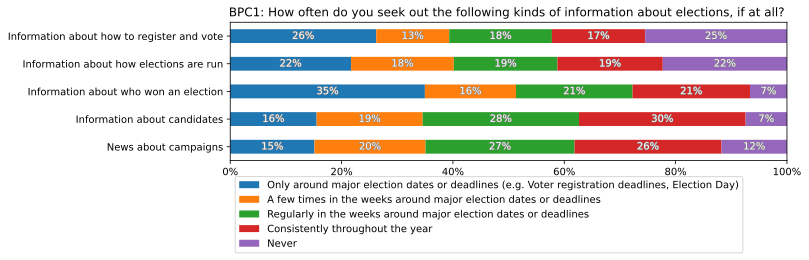

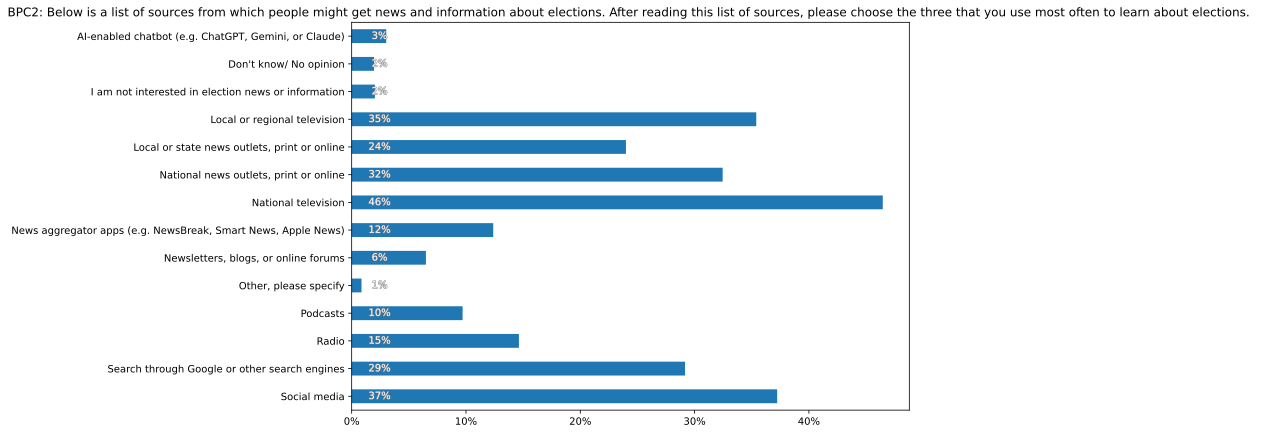

In [13]:
# TO ASK MOST QUESTIONS FOR 2024
demo = None

questions = [f"BPC{i}" for i in range(1, 3)]

for question in questions:
     df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo,suppress_output=False)

In the United States, there is information voters need to register and vote. Where are you most likely to look for this information? Please select up to three.   \
Local or county administrators                                                                  27.2%                                                                                                                 
Friends and family                                                                              24.1%                                                                                                                 
A federal agency or website dedicated to electi...                                              23.2%                                                                                                                 
News media professionals (local/national TV new...                                              19.3%                                                                                                                 
State election administrators                                                                   19.3%                                                                                                                 
Election-related organizations (including integ...                                              15.0%                                                                                                                 
Your preferred candidate                                                                        14.0%                                                                                                                 
Your favorite social media influencer or conten...                                              10.5%                                                                                                                 
A national political party organization                                                         10.4%                                                                                                                 
Elected officials at any level (e.g. mayors, go...                                               9.0%                                                                                                                 
Don't know/ No opinion                                                                           8.9%                                                                                                                 
Your favorite commentator or analyst from a rad...                                               8.8%                                                                                                                 
Fact-checking organizations (e.g. Snopes, Polit...                                               8.2%                                                                                                                 
Civic or religious organizations in your community                                               7.2%                                                                                                                 
Other, please specify                                                                            2.0%                                                                                                                 

                                                   If you wanted to know more about how elections are run in the United States, where would you be most likely look for that information? Please select up to three.   \
Local or county administrators                                                                  16.8%                                                                                                                   
Friends and family                                                                              17.4%                                                                           

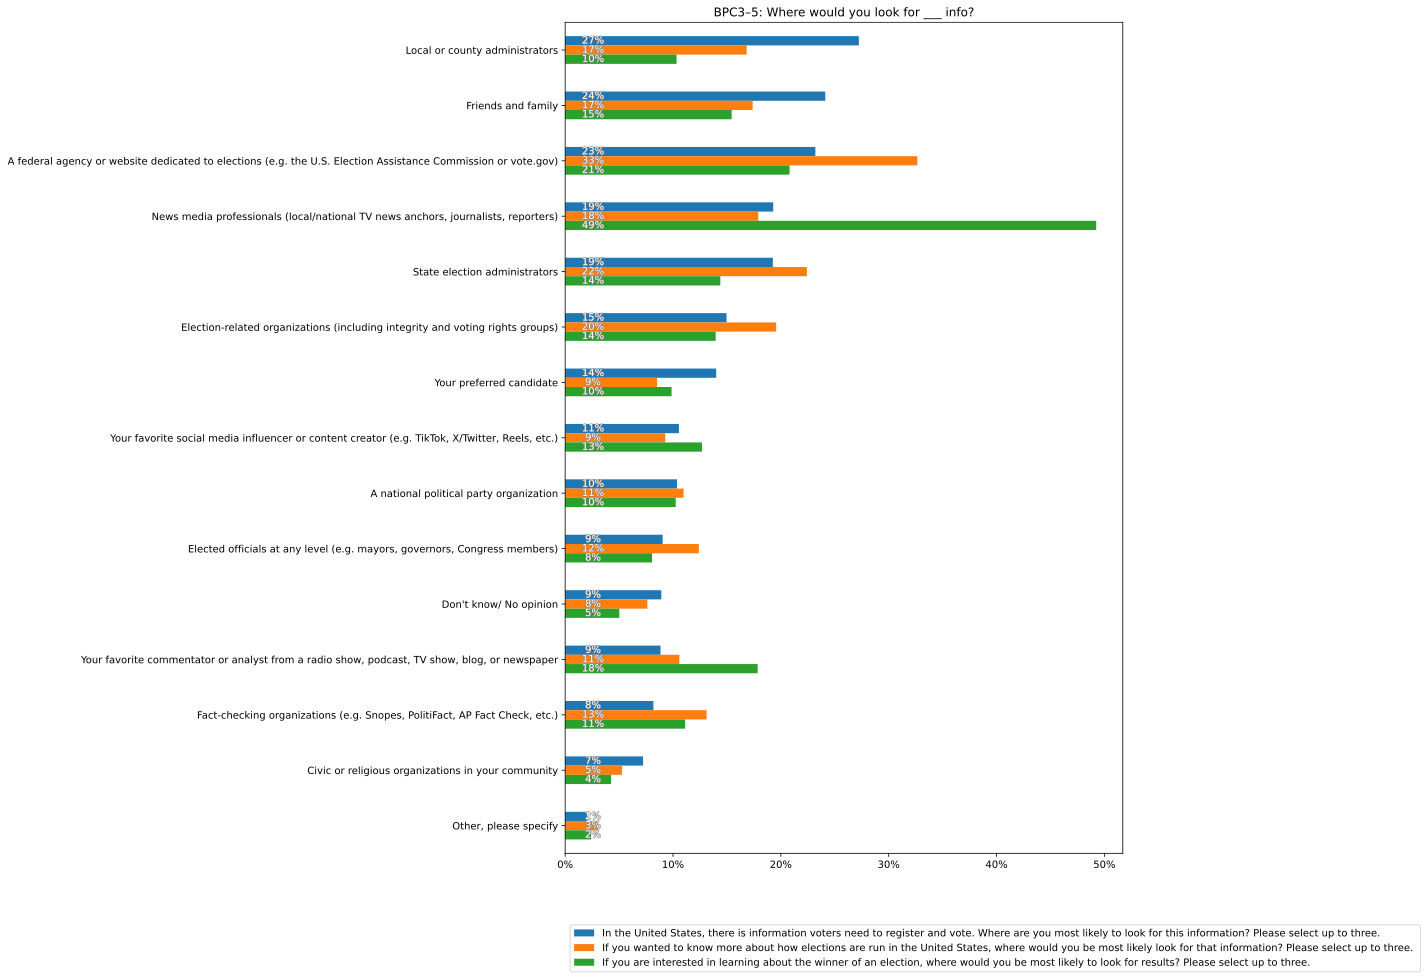

In [14]:
questions = [f"BPC{j}" for j in range(3, 6)]

final_df = mc_processor.get_parallel_questions(data, codebook, q_codebook, questions, survey_year)
display(final_df.map(lambda x: f"{x:.1%}"))
ax = visualizing.plot_question(final_df, 'BPC3–5', 'Where would you look for ___ info?')

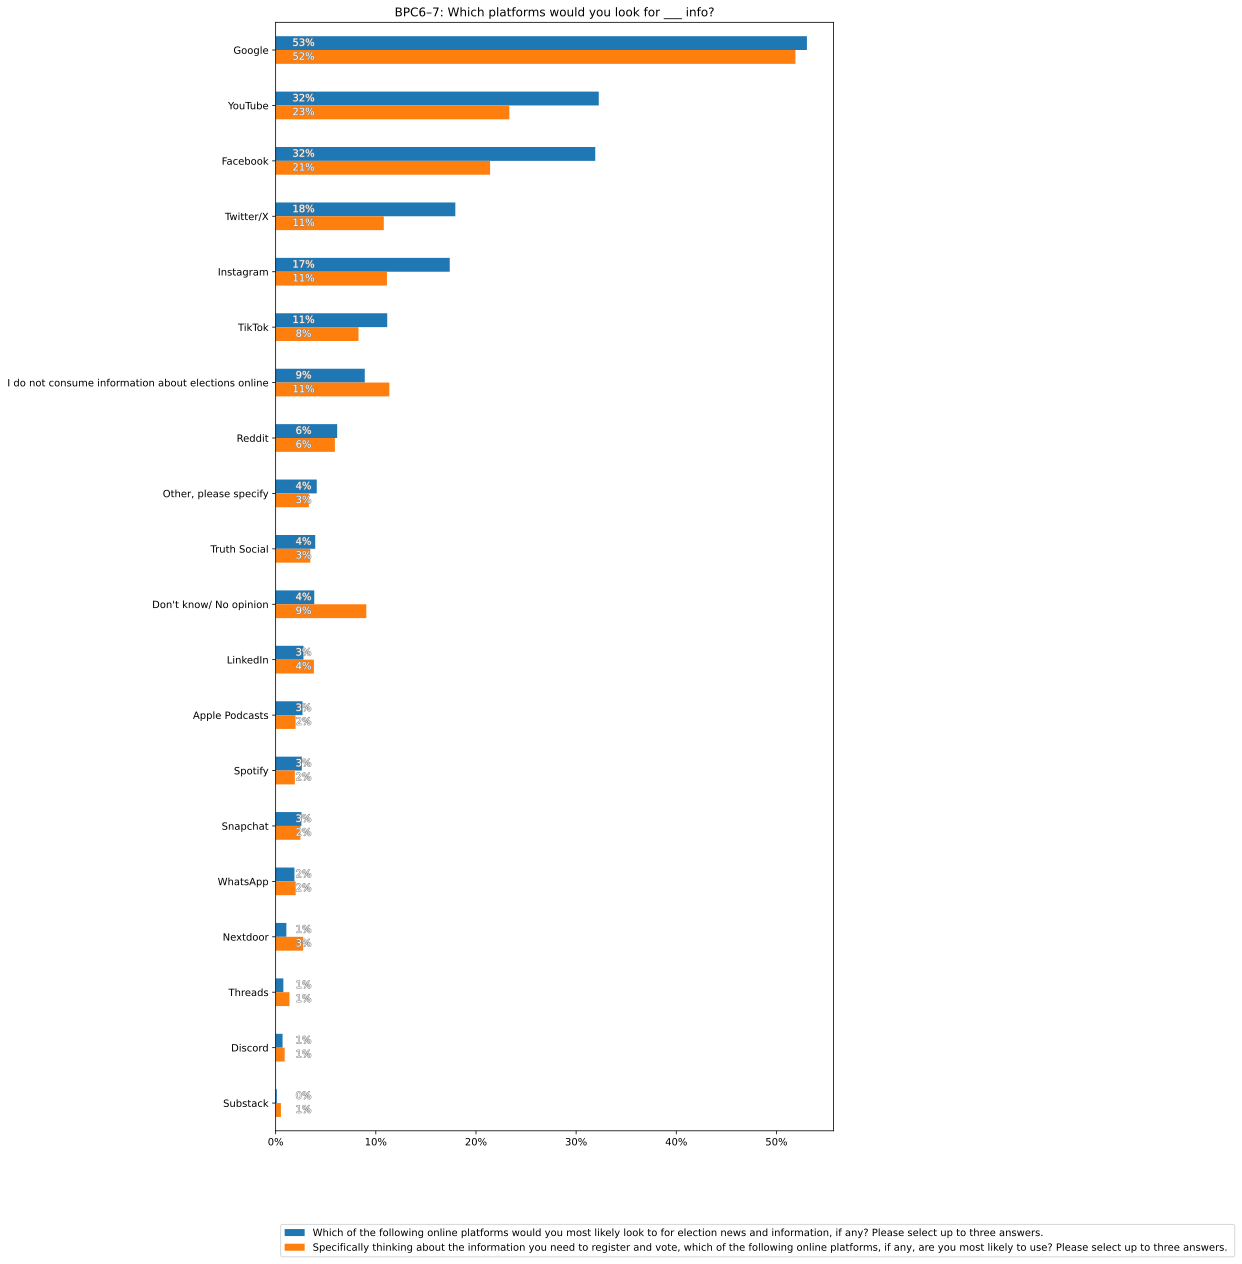

In [15]:
questions = [f"BPC{j}" for j in range(6, 8)]

final_df = mc_processor.get_parallel_questions(data, codebook, q_codebook, questions, survey_year)

ax = visualizing.plot_question(final_df, 'BPC6–7', 'Which platforms would you look for ___ info?')

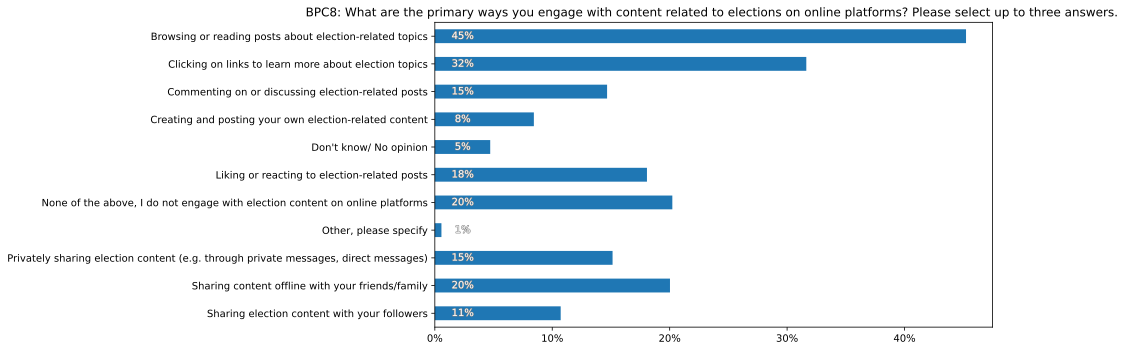

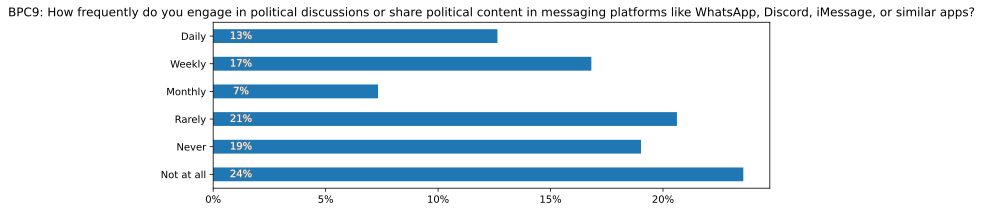

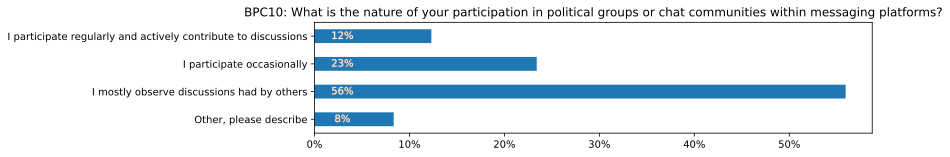

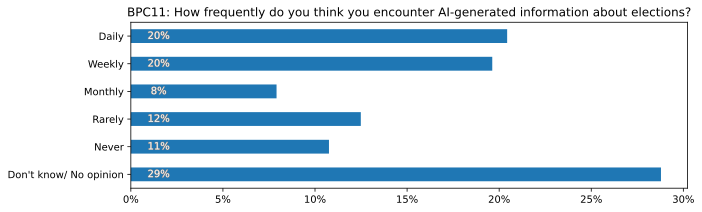

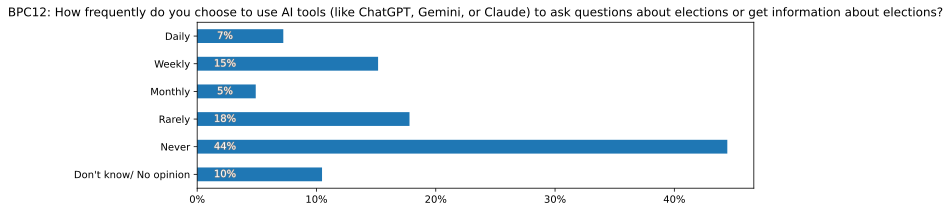

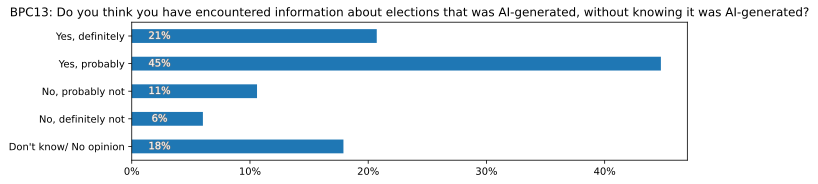

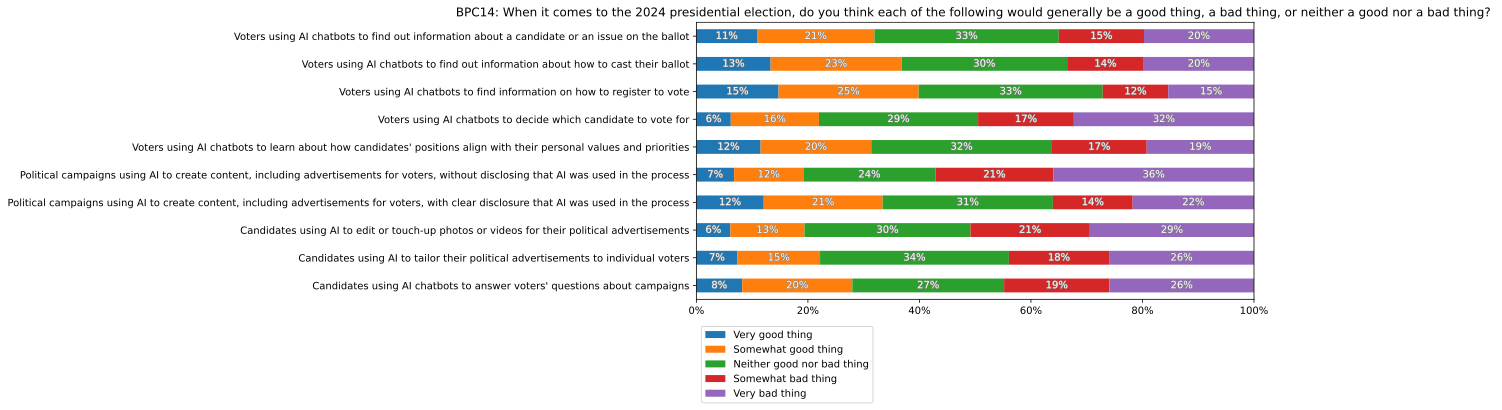

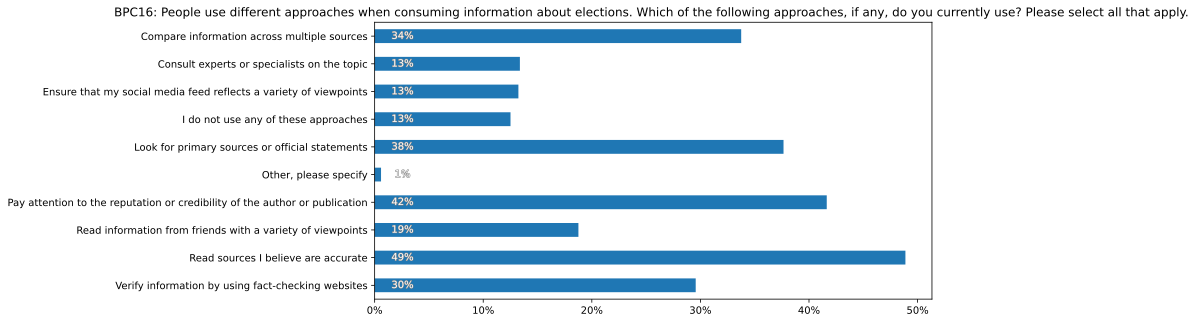

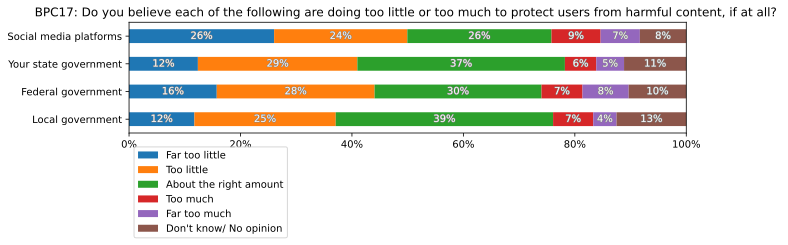

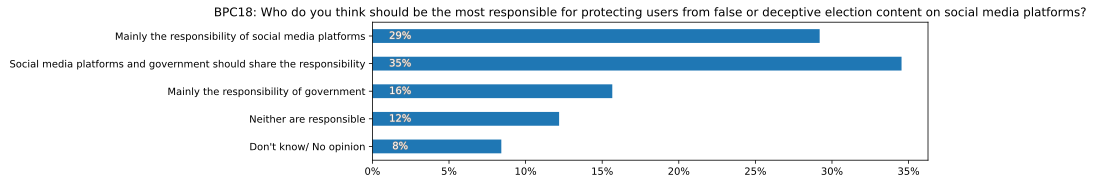

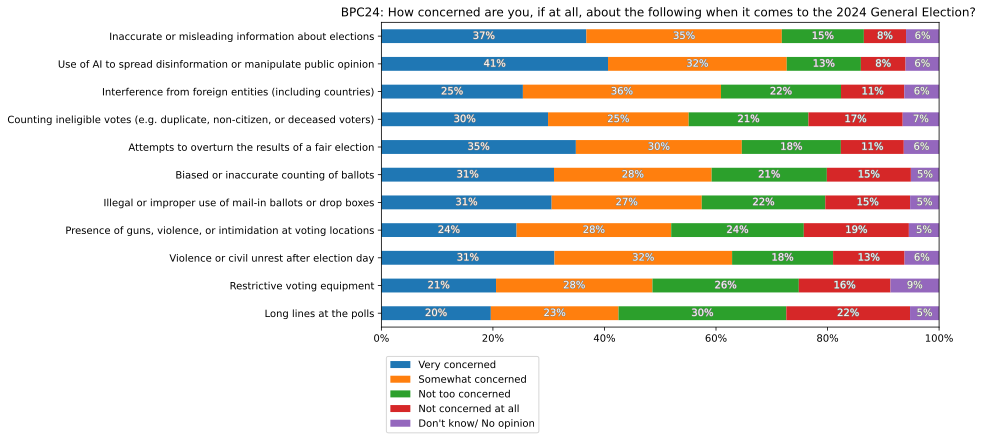

In [16]:
questions = [f"BPC{i}" for i in range(8, 20)] + ['BPC24']

for question in questions:
     df = mc_processor.run_and_display(data,codebook,q_codebook,question,survey_year,demo,suppress_output=False)


MISC - Figuring out conjoint issue

In [17]:
# # get columsn in data that start iwth "BPC6"
# data[data.filter(regex='^BPC6').columns]

In [18]:
# q_columns = data.filter(regex='^'+question+"_").columns

# data_type_check(data,q_columns)

# data.filter(regex='^' + question + r'[a-z]$').columns